Import Library

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import csv file

In [37]:
Customer = pd.read_csv( 'Customer.csv')
Prod = pd.read_csv( 'prod_cat_info.csv')
Transactions = pd.read_csv( 'Transactions.csv')

menggabungkan ketiga tabel 

In [38]:
transaction_customer = pd.merge(Transactions,Customer,left_on='cust_id',right_on='customer_Id')
transaction_customer_prod = pd.merge(transaction_customer,Prod,left_on=['prod_subcat_code','prod_cat_code'] ,right_on=['prod_cat_code', 'prod_cat_code'])

menampilkan hasil tabel

In [39]:
transaction_customer_prod

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
1,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
2,80712190438,270351,28-02-2014,1,1,-5,-772,405.30,-4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,3,Kids
3,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,4,Mens
4,80712190438,270351,20-02-2014,1,1,5,772,405.30,4265.30,e-Shop,270351,26-09-1981,M,5.0,Clothing,1,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5000,18727956164,267161,23-02-2011,4,4,5,668,350.70,3690.70,e-Shop,267161,08-05-1981,M,9.0,Bags,4,Women
5001,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,1,Mens
5002,60416814232,273281,18-02-2011,4,4,4,202,84.84,892.84,Flagship store,273281,14-12-1988,F,9.0,Bags,4,Women
5003,83245680995,273723,26-01-2011,4,4,4,1477,620.34,6528.34,e-Shop,273723,21-01-1984,F,4.0,Bags,1,Mens


 jumlah data yang tersedia


In [40]:
transaction_customer_prod.shape

(5005, 17)

In [ ]:
transaction_customer_prod.dtypes

transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
customer_Id            int64
DOB                   object
Gender                object
city_code            float64
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

Deskripsikan statistika data sederhana (mean, max, min,..) menggunakan fungsi pandas


In [ ]:
Data_min = transaction_customer_prod['total_amt'].min()
Data_max = transaction_customer_prod['total_amt'].max()
Data_q1  = np.percentile(transaction_customer_prod.total_amt,25)
median  = np.percentile(transaction_customer_prod.total_amt,50)
Data_q3  = np.percentile(transaction_customer_prod.total_amt,75)
print('Min = ',Data_min)
print('Max = ',Data_max)
print('Median = ',median)
print('Q1 = ',Data_q1)
print('Q3 = ',Data_q3)

Min =  -8154.9
Max =  8281.975
Median =  1712.75
Q1 =  703.885
Q3 =  3547.05


Bantulah perusahaan untuk bisa menentukan berapa banyak pelanggan berdasarkan jenis kelamin (men vs women)

In [41]:
freq_table = pd.crosstab(index = transaction_customer_prod['Gender'],
                         columns = transaction_customer_prod['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,487,511,461,953
Female,505,595,479,1008


Mana y store type yang paling banyak diakses oleh pelanggan untuk mencari produk di perusahaan retail ini.


In [ ]:
freq_table = pd.crosstab(index = transaction_customer_prod['Gender'],
                         columns = transaction_customer_prod['Store_type'])
freq_table.columns = ['Bags','Clothing','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Bags,Clothing,Electronics,Home and kitchen
Male,487,511,461,953
Female,505,595,479,1008


Bantulah perusahaan untuk bisa menentukan product kategori (prod_cat) mana saja yang paling banyak diminati laki-laki dan perempuan 

In [49]:
byGender = transaction_customer_prod.groupby(by=["Gender"]).count()
female = byGender['transaction_id'][0]
male =  byGender['transaction_id'][1]

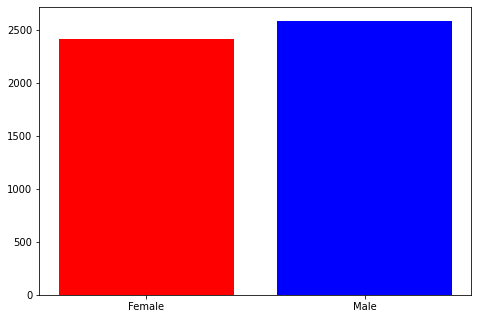

Gender
F    2412
M    2587
Name: transaction_id, dtype: int64

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Female', 'Male']
ax.bar(langs,[female, male], color=['red', 'blue'])
plt.show()
byGender['transaction_id']

Mana y bulan dengan penjualan tertinggi dan terendah selama satu tahun.

In [52]:
transaction_customer_prod['month'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).month
jumlah = transaction_customer_prod.groupby(by=["month"]).count()
jumlah['transaction_id']

month
1     473
2     380
3     432
4     369
5     407
6     407
7     422
8     411
9     422
10    478
11    438
12    366
Name: transaction_id, dtype: int64

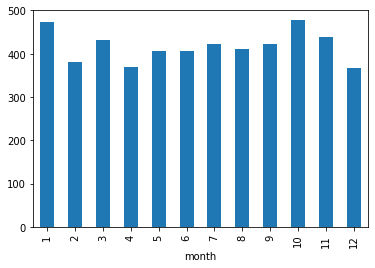

In [53]:
jumlah['transaction_id'].plot.bar()

In [54]:
transaction_customer_prod['year'] = pd.DatetimeIndex(transaction_customer_prod['tran_date']).year
jumlah = transaction_customer_prod.groupby(by=["year"]).count()
jumlah['transaction_id']

year
2011    1417
2012    1635
2013    1693
2014     260
Name: transaction_id, dtype: int64

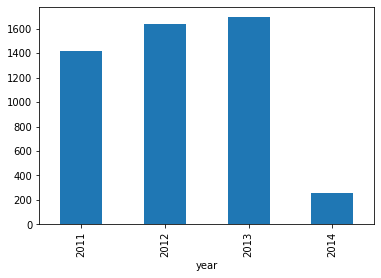

In [55]:
jumlah['transaction_id'].plot.bar()